In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pickle
from linearAlgebra import Matrix
import math

In [43]:
def normalize(pred):
    sum_ = sum(pred[0])
    for i in range(len(pred[0])):
        pred[0][i] /= sum_
    return pred

def decode_categorical(pred):
    predicted_num = pred[0].index(max(pred[0]))
    return f"The predicted number is {predicted_num} with {pred[0][predicted_num]*100:.2f}% degree of confidence"

def print_confidence_all(pred):
    for i in range(len(pred[0])):
        print(f"{i}: {pred[0][i]*100:.2f}% degree of confidence")

In [4]:
model = "models/mnist_60000_1616_003_30.pkl"
file = open(model, "rb")
net = pickle.load(file)

In [5]:
#Single digit on image

def digit_processing(file):
    image = cv.imread(file, cv.IMREAD_GRAYSCALE)
    image = cv.resize(255 - image, (28, 28))
    (thresh, image) = cv.threshold(image, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    image = image.astype('float32')

    while np.sum(image[0]) == 0:
        image = image[1:]

    while np.sum(image[:,0]) == 0:
        image = np.delete(image,0,1)

    while np.sum(image[-1]) == 0:
        image = image[:-1]

    while np.sum(image[:,-1]) == 0:
        image = np.delete(image,-1,1)

    rows,cols = image.shape

    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        image = cv.resize(image, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        image = cv.resize(image, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)), int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)), int(math.floor((28-rows)/2.0)))
    image = np.lib.pad(image,(rowsPadding,colsPadding),'constant')
    return image, image.reshape(1, 28*28)/255.0

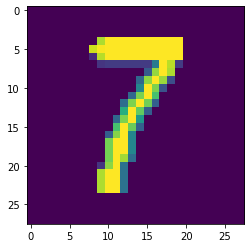

The predicted number is 2 with 93.95% degree of confidence 

0: 0.02% degree of confidence
1: 0.43% degree of confidence
2: 93.95% degree of confidence
3: 4.10% degree of confidence
4: 0.00% degree of confidence
5: 0.08% degree of confidence
6: 0.05% degree of confidence
7: 0.00% degree of confidence
8: 1.37% degree of confidence
9: 0.00% degree of confidence


In [54]:
file = "digits/7_2.png"
image, digit = digit_processing(file)
plt.imshow(image)
plt.show()

predicted = normalize(net.predict(Matrix(digit.tolist())))

print(decode_categorical(predicted), '\n')
print_confidence_all(predicted)
